In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as si
import os

In [2]:
initial_data = yf.download("AXP", start="2020-03-01", end="2021-03-01")

[*********************100%***********************]  1 of 1 completed


In [3]:
initial_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-02,111.110001,113.989998,108.589996,113.870003,111.868332,9851600
2020-03-03,115.019997,116.400002,107.000000,108.010002,106.111351,9285000
2020-03-04,110.250000,115.790001,109.250000,115.699997,113.666161,7470900
2020-03-05,111.620003,112.589996,109.699997,110.940002,108.989838,12060600
2020-03-06,105.730003,108.769997,103.790001,108.239998,106.337288,9897700


In [4]:
initial_data['Adj Close'].head()

Date
2020-03-02    111.868332
2020-03-03    106.111351
2020-03-04    113.666161
2020-03-05    108.989838
2020-03-06    106.337288
Name: Adj Close, dtype: float64

In [5]:
data =  initial_data['Adj Close']

array([<AxesSubplot:xlabel='Date'>], dtype=object)

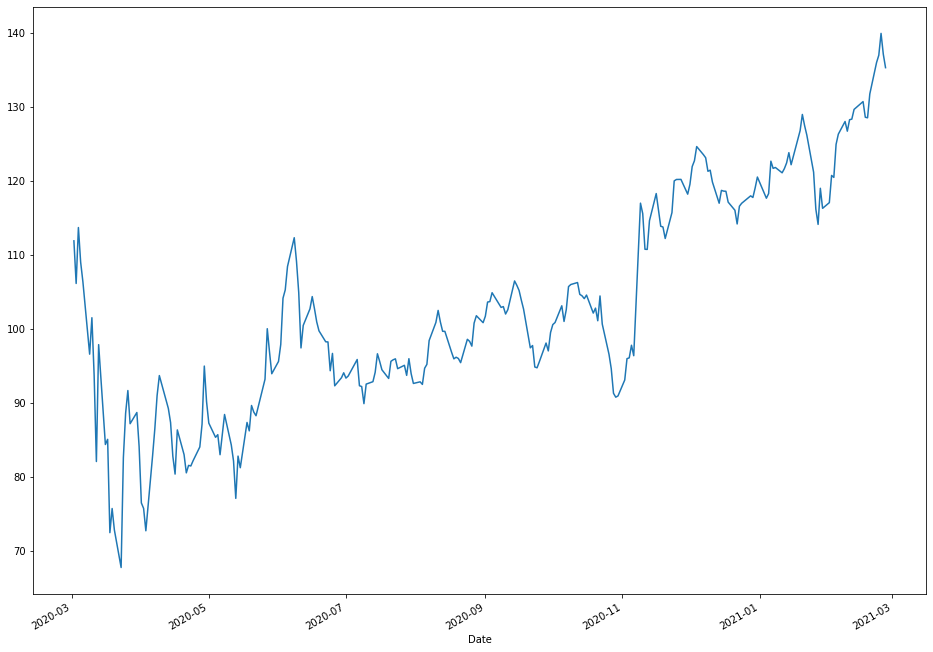

In [6]:
#Plotting the graph for the above time period
data.plot(figsize=(16, 12), subplots=True)

In [7]:
AXP = yf.download("AXP", start="2020-03-01", end="2021-03-01")

[*********************100%***********************]  1 of 1 completed


In [8]:
S = AXP['Adj Close'][-1]
print('The spot price is $', round(S,2), '.')

The spot price is $ 135.26 .


In [9]:
log_return = np.log(AXP['Adj Close'] / AXP['Adj Close'].shift(1))
vol_h = np.sqrt(252) * log_return.std()
print('The annualised volatility is', round(vol_h*100,2), '%')

The annualised volatility is 63.35 %


In [10]:
AXP_6M = yf.download("AXP", start="2020-09-01", end="2021-03-01")

[*********************100%***********************]  1 of 1 completed


In [11]:
S = AXP_6M['Adj Close'][-1]
print('The spot price is $', round(S,2), '.')

The spot price is $ 135.26 .


In [12]:
log_return = np.log(AXP_6M['Adj Close'] / AXP_6M['Adj Close'].shift(1))
vol_h = np.sqrt(252) * log_return.std()
print('The annualised volatility is', round(vol_h*100,2), '%')

The annualised volatility is 41.49 %


In [13]:
#Monte Carlo Simulation
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [14]:
T = 4/52
r = 0.0145
sigma = 0.5242
S0 = 135.26
K = 130

In [15]:
S = mcs_simulation_np(1000)

In [16]:
S = np.transpose(S)
S

array([[135.26      , 135.71823433, 135.7956787 , ..., 154.05543178,
        154.37044561, 154.45469436],
       [135.26      , 135.06356946, 134.78160566, ..., 139.96580984,
        140.66069417, 141.39951437],
       [135.26      , 135.67927444, 136.2062799 , ..., 102.20674325,
        101.81850294, 101.92170441],
       ...,
       [135.26      , 135.58461927, 136.53378067, ..., 138.44603352,
        139.00992437, 139.38286794],
       [135.26      , 135.46017253, 135.59767405, ..., 118.1148139 ,
        118.10802534, 117.38609505],
       [135.26      , 134.38627416, 136.67406057, ..., 120.3199261 ,
        120.80336364, 121.6844322 ]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

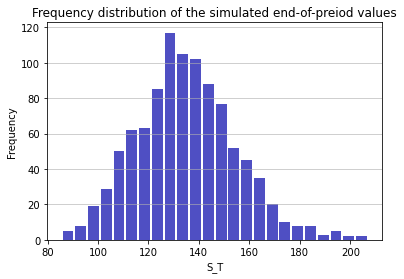

In [17]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [22]:
p = (K - S[-1,:])>0
bp = np.mean(np.maximum(pp.astype(int),0))
print('Binary put', str(bpp))

Binary put 0.7892107892107892


In [29]:
#Black Scholes Model
def binary_option_bsm(S, K, T, r, q, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #q: continuous dividend yield
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value =  - S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [30]:
binary_option_bsm(135.26, 130, 1/12, 0.0145, 0, 0.5242, 'put')

5.5751780113098945

In [33]:
S = np.linspace(10,70,11)
pp = np.zeros((len(S),1))
for i in range(len(S)):
    pp[i] = binary_option_bsm(S[i], 130, 1/12, 0.0145, 0, 0.5242, 'put')

In [35]:
pp

array([[119.84301153],
       [113.84301153],
       [107.84301153],
       [101.84301153],
       [ 95.84301153],
       [ 89.84301153],
       [ 83.84301153],
       [ 77.84301153],
       [ 71.84301165],
       [ 65.84301553],
       [ 59.84308252]])

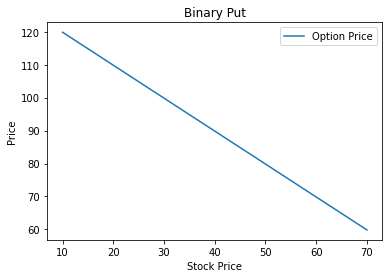

In [36]:
fig = plt.figure()
plt.plot(S, pp, '-')
plt.xlabel('Stock Price')
plt.ylabel('Price')
plt.title('Binary Put')
plt.legend(['Option Price','Payoff at T'])

In [37]:
#GREEKS

In [43]:
#Delta

def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta

In [44]:
delta(135.26, 130, 1/12, 0.0145, 0, 0.5242, 'put')

-0.36476024938159385

In [45]:
S = np.linspace(50,150,11)
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Put [i] = delta(S[i], 130, 1/12, 0.0145, 0, 0.5242, 'put')

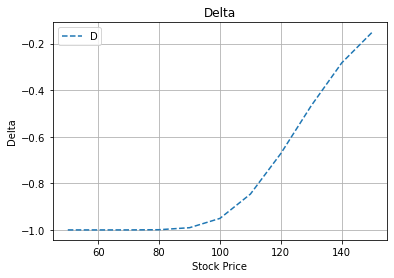

In [46]:
fig = plt.figure()
plt.plot(S, Delta_Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend('Delta for Put')

In [51]:
#Gamma

def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(-r * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [52]:
gamma(135.26, 130, 1/12, 0.0145, 0, 0.5242, 'put')

0.01833787683279919

In [53]:
S = np.linspace(50,150,11)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 130, 1/12, 0.0145, 0, 0.5242, 'put')

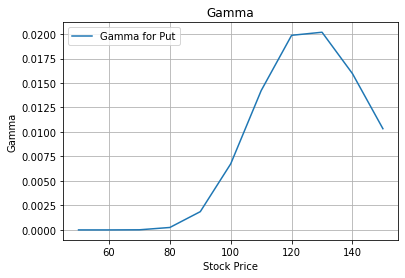

In [54]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Put'])

In [57]:
#Speed

def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [58]:
speed(135.26, 130, 1/12, 0.0145, 0, 0.5242, 'put')

0.0001287181493611661

In [59]:
S = np.linspace(50,150,11)
Speed = np.zeros((len(S),1))
for i in range(len(S)):
    Speed [i] = speed(S[i], 130, 1/12, 0.0145, 0, 0.5242, 'put')

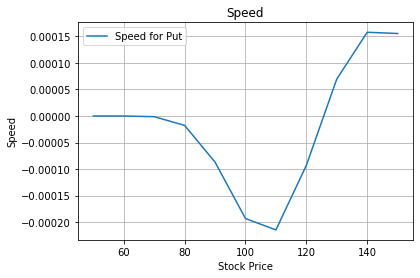

In [60]:
fig = plt.figure()
plt.plot(S, Speed, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['Speed for Put'])

In [61]:
#Rho

def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [62]:
rho(135.26, 130, 1/12, 0.0145, 0, 0.5242, 'put')

-4.576054111888689

In [63]:
S = np.linspace(50,150,11)
Rho = np.zeros((len(S),1))
for i in range(len(S)):
    Rho [i] = rho(S[i], 130, 1/12, 0.0145, 0, 0.5242, 'put')

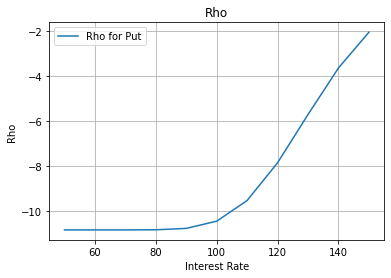

In [68]:
fig = plt.figure()
plt.plot(S, Rho, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Put'])

In [69]:
#Vega

def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [70]:
vega(135.26, 130, 1/12, 0.0145, 0, 0.5242, 'put')

14.673319047934692

In [71]:
S = np.linspace(50,150,11)
Vega = np.zeros((len(S),1))
for i in range(len(S)):
    Vega [i] = vega(S[i], 130, 1/12, 0.0145, 0, 0.5242, 'put')

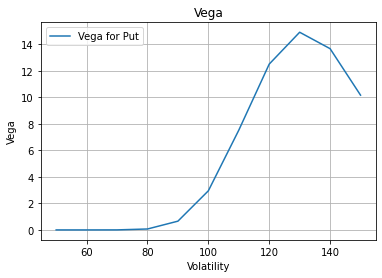

In [72]:
fig = plt.figure()
plt.plot(S, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for Put'])